# Proyecto de visualización:

-Una vez elaborada mi base de datos procedo al proceso de visualización para mostrar mi hipótesis, que los clubs con escuelas y categorías inferiores son los que mayor oportunidades tienen de llegar a alcanazr grandes logros en el rugby.

In [5]:
import pandas as pd
import requests as req
from bs4 import BeautifulSoup as bs
import re
import json
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import csv
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
from selenium import webdriver

In [6]:
import pylab as plt
import seaborn as sns

#para que salga el grafico
%matplotlib inline

In [7]:
%pip install ipython
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [8]:
gobierno=pd.read_csv('data/tablasfinales/cleangobiernocolo.csv')
gobierno

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,19613.0,21037.0,23195.0,22083.0,23319.0,25341.0,27361.0,29570.0,30550.0,31965.0,32011.0,26358.0
1,1359.0,1310.0,1654.0,1680.0,2573.0,3138.0,4331.0,4662.0,5132.0,5817.0,5739.0,5975.0


In [9]:
gobierno.index = ['Hombres', 'Mujeres']
gobierno

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Hombres,19613.0,21037.0,23195.0,22083.0,23319.0,25341.0,27361.0,29570.0,30550.0,31965.0,32011.0,26358.0
Mujeres,1359.0,1310.0,1654.0,1680.0,2573.0,3138.0,4331.0,4662.0,5132.0,5817.0,5739.0,5975.0


<AxesSubplot:>

<Figure size 2160x1440 with 0 Axes>

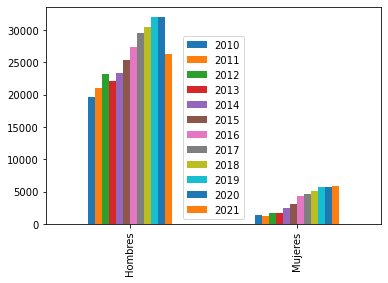

In [10]:
plt.figure(figsize=(30, 20))
gobierno.plot.bar()


In [11]:
dh=pd.read_csv('data/tablasfinales/cleandi.csv')
dh

,Federaciones,Senior Masc,Senior Fem,Seven Masc.,Seven Fem.,Sub18,Total
0,Andalucía,x,2.0,2.0,1.0,1.0,6.0
1,Baleares,x,1.0,x,x,1.0,2.0
2,Cantabria,x,x,1.0,x,x,1.0
3,Castilla y León,13.0,x,3.0,x,x,15.0
4,Cataluña,8.0,2.0,3.0,x,x,13.0
5,Galicia,x,3.0,x,1.0,x,4.0
6,Madrid,4.0,13.0,8.0,16.0,5.0,46.0
7,Valencia,x,x,1.0,x,3.0,4.0
8,País Vasco,3.0,4.0,1.0,5.0,1.0,14.0
9,En Francia,25.0,4.0,x,1.0,x,31.0


In [14]:
dhf=pd.read_csv('data/tablasfinales/cleandif.csv')
dhf

,JUGADORAS,EQUIPOS
0,Maika BRUST,Eibar Rugby Taldea
1,Sidorella BRACIC\n,CR Olímpico de Pozuelo
2,Laura DELGADO\n,Exeter Chiefs
3,Marta ESTELLÉS\n,CR Majadahonda
4,Saioa JAURENA,Association Sportive Bayonnaise
5,Isabel RICO,CR Olímpico de Pozuelo
6,Aleuzenev CID\n,Eibar Rugby Taldea
7,Marieta ROMÁN,Universitario de Sevilla CR
8,Cristina BLANCO,CR Olímpico de Pozuelo
9,Isabel MACÍAS,AC Bobigny 93 Rugby


In [15]:
vdhf=dhf.EQUIPOS.value_counts()

vdhf

CR Majadahonda                     7
CR Complutense Cisneros            7
Eibar Rugby Taldea                 5
Universitario de Sevilla CR        5
CR Olímpico de Pozuelo             3
AC Bobigny 93 Rugby                3
Sanse Scrum RC                     3
CR Sant Cugat                      3
Exeter Chiefs                      2
Association Sportive Bayonnaise    2
Barça Rugby                        2
FER                                2
Stade Rennais                      1
UE Santboiana                      1
CRAT A Coruña                      1
Stade Toulousain                   1
Name: EQUIPOS, dtype: int64

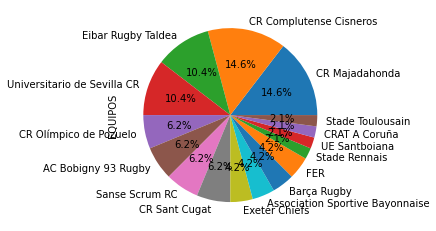

In [16]:
femenino = vdhf.plot.pie(autopct="%.1f%%")

In [17]:
dhmf=pd.read_csv('data/tablasfinales/cleantabladivision.csv')
dhmf

,Categoria,Año,Campeón,Subcampeón,Tercero,Desciende
0,Femenina,2010-11,INEF Barcelona (8º),CRAT,CR Majadahonda,Gaztedi RT
1,Femenina,2011-12,INEF Barcelona (9º),CRAT,Bizkarians RE,Sanse Scrum
2,Femenina,2012-13,INEF Barcelona (10º),Olímpico de Pozuelo RC,CRAT,Gòtics RC
3,Femenina,2013-14,Olímpico de Pozuelo RC (1º),CRAT,INEF Barcelona,-
4,Femenina,2014-15,CRAT (1º),Getxo RT,Olímpico de Pozuelo RC,Complutense Cisneros
5,Femenina,2015-16,INEF Barcelona (11º),CR Majadahonda,Sanse Scrum,-
6,Femenina,2016-17,Olímpico de Pozuelo RC (2º),CRAT,CR Majadahonda,GEiEG
7,Femenina,2017-18,Olímpico de Pozuelo RC (3º),CR Majadahonda,CRAT,Getxo RT
8,Femenina,2018-19,CRAT (2º),INEF-L'Hospitalet,CR Majadahonda,XV Hortaleza RC
9,Femenina,2019-20,Corteva Cocos Rugby (1º),CR Majadahonda,CR Complutense Cisneros,INEF-L'Hospitalet\nAutoconsa El Salvador


In [18]:
dhmf.Campeón.unique

<bound method Series.unique of 0              INEF Barcelona (8º)
1              INEF Barcelona (9º)
2             INEF Barcelona (10º)
3      Olímpico de Pozuelo RC (1º)
4                        CRAT (1º)
5             INEF Barcelona (11º)
6      Olímpico de Pozuelo RC (2º)
7      Olímpico de Pozuelo RC (3º)
8                        CRAT (2º)
9         Corteva Cocos Rugby (1º)
10    CR Complutense Cisneros (1º)
11        Corteva Cocos Rugby (2º)
12                    C.R. La Vila
13        VRAC Quesos Entrepinares
14        VRAC Quesos Entrepinares
15        VRAC Quesos Entrepinares
16        VRAC Quesos Entrepinares
17         SilverStorm El Salvador
18        VRAC Quesos Entrepinares
19        VRAC Quesos Entrepinares
20        VRAC Quesos Entrepinares
21        VRAC Quesos Entrepinares
22        VRAC Quesos Entrepinares
23                   UE Santboiana
Name: Campeón, dtype: object>

In [19]:
dhmf.Campeón.replace(['INEF Barcelona (9º)','INEF Barcelona (10º)','Olímpico de Pozuelo RC (1º)',' CRAT (1º)','INEF Barcelona (11º)',
                  'Olímpico de Pozuelo RC (2º)','Olímpico de Pozuelo RC (3º)','CRAT (2º)','Corteva Cocos Rugby (1º)',
                 'CR Complutense Cisneros (1º)','Corteva Cocos Rugby (2º)'],
                        ['INEF Barcelona','INEF Barcelona','Olímpico de Pozuelo RC','CRAT','INEF Barcelona',
                         'Olímpico de Pozuelo RC ','Olímpico de Pozuelo RC ','CRAT','Corteva Cocos Rugby',
                 'CR Complutense Cisneros','Corteva Cocos Rugby'],
                        inplace=True)

In [20]:
dhmf.Campeón.unique()

array(['INEF Barcelona (8º)', 'INEF Barcelona', 'Olímpico de Pozuelo RC',
       'CRAT (1º)', 'Olímpico de Pozuelo RC ', 'CRAT',
       'Corteva Cocos Rugby', 'CR Complutense Cisneros', 'C.R. La Vila',
       'VRAC Quesos Entrepinares', 'SilverStorm El Salvador',
       'UE Santboiana'], dtype=object)

In [21]:
dhmf.Campeón.replace(['INEF Barcelona (8º)', 'INEF Barcelona', 'Olímpico de Pozuelo RC',
       'CRAT (1º)', 'Olímpico de Pozuelo RC ', 'CRAT',
       'Corteva Cocos Rugby', 'CR Complutense Cisneros', 'C.R. La Vila',
       'VRAC Quesos Entrepinares', 'SilverStorm El Salvador',
       'UE Santboiana'],['INEF Barcelona', 'INEF Barcelona', 'Olímpico de Pozuelo RC',
       'CRAT', 'Olímpico de Pozuelo RC ', 'CRAT',
       'Corteva Cocos Rugby', 'CR Complutense Cisneros', 'C.R. La Vila',
       'VRAC Quesos Entrepinares', 'SilverStorm El Salvador',
       'UE Santboiana'], inplace=True)

In [22]:
dhmf.head()

,Categoria,Año,Campeón,Subcampeón,Tercero,Desciende
0,Femenina,2010-11,INEF Barcelona,CRAT,CR Majadahonda,Gaztedi RT
1,Femenina,2011-12,INEF Barcelona,CRAT,Bizkarians RE,Sanse Scrum
2,Femenina,2012-13,INEF Barcelona,Olímpico de Pozuelo RC,CRAT,Gòtics RC
3,Femenina,2013-14,Olímpico de Pozuelo RC,CRAT,INEF Barcelona,-
4,Femenina,2014-15,CRAT,Getxo RT,Olímpico de Pozuelo RC,Complutense Cisneros


In [23]:
df_plot = pd.DataFrame(dhmf.groupby(["Categoria", "Campeón"]).agg({"Campeón": "count"}))

In [24]:
df_plot.columns = ["count"]
df_plot.reset_index()

,Categoria,Campeón,count
0,Femenina,CR Complutense Cisneros,1
1,Femenina,CRAT,2
2,Femenina,Corteva Cocos Rugby,2
3,Femenina,INEF Barcelona,4
4,Femenina,Olímpico de Pozuelo RC,1
5,Femenina,Olímpico de Pozuelo RC,2
6,Masculina,C.R. La Vila,1
7,Masculina,SilverStorm El Salvador,1
8,Masculina,UE Santboiana,1
9,Masculina,VRAC Quesos Entrepinares,9


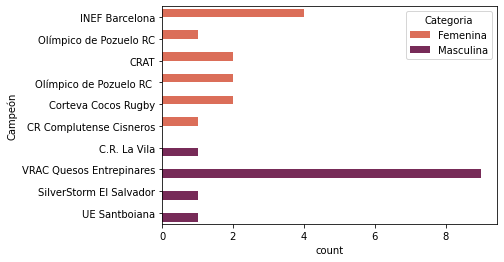

In [25]:
sns.countplot(y="Campeón", hue="Categoria", data = dhmf,  palette="rocket_r");

In [26]:
df_plot2 = pd.DataFrame(dhmf.groupby(["Categoria", "Subcampeón"]).agg({"Subcampeón": "count"}))

In [27]:
df_plot2.columns = ["count"]
df_plot2.reset_index()

,Categoria,Subcampeón,count
0,Femenina,CR Majadahonda,5
1,Femenina,CRAT,4
2,Femenina,Getxo RT,1
3,Femenina,INEF-L'Hospitalet,1
4,Femenina,Olímpico de Pozuelo RC,1
5,Masculina,AMPO Ordizia,2
6,Masculina,AMPO Ordizia RE,1
7,Masculina,El Salvador,1
8,Masculina,Lexus Alcobendas,1
9,Masculina,SilverStorm El Salvador,4


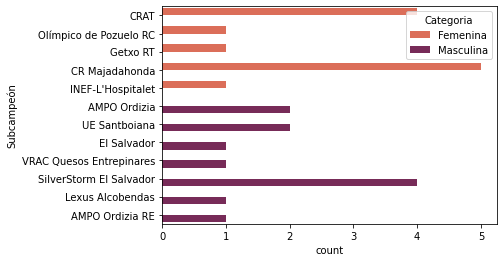

In [28]:
sns.countplot(y="Subcampeón", hue="Categoria", data = dhmf,  palette="rocket_r");

In [33]:
escuela=pd.read_csv('data/tablasfinales/cleantablaesc.csv')
escuela

,TEMPORADA,FEDERACIÓN,Total,T. Jres,Senior,Sub\n21,Sub\n18,Sub\n16,Sub\n14,Sub\n12,Sub\n10,Sub\n8,Sub\n6,T.\nJras,Esc.
0,2016,Andalucía,4247.0,3628.0,1154.0,288.0,428.0,396.0,370.0,354.0,293.0,216.0,129.0,343.0,0.0
1,2016,Aragón,738.0,557.0,307.0,80.0,103.0,52.0,10.0,0.0,1.0,1.0,3.0,131.0,330.0
2,2016,Asturias,903.0,669.0,183.0,14.0,77.0,83.0,112.0,74.0,64.0,45.0,17.0,135.0,0.0
3,2016,Baleares,932.0,824.0,262.0,39.0,84.0,98.0,114.0,69.0,86.0,49.0,23.0,69.0,165.0
4,2016,Canarias,243.0,224.0,106.0,29.0,55.0,17.0,13.0,3.0,1.0,0.0,0.0,13.0,75.0
5,2016,Cantabria,575.0,427.0,105.0,30.0,55.0,47.0,71.0,52.0,42.0,20.0,5.0,61.0,0.0
6,2016,Cas. y León,2161.0,1639.0,436.0,112.0,154.0,171.0,164.0,172.0,176.0,167.0,87.0,339.0,0.0
7,2016,Cataluña,6493.0,4995.0,1572.0,386.0,519.0,598.0,593.0,479.0,410.0,288.0,150.0,936.0,0.0
8,2016,Extremadura,327.0,311.0,125.0,14.0,36.0,52.0,40.0,23.0,13.0,3.0,5.0,0.0,0.0
9,2016,Galicia,1482.0,1098.0,368.0,108.0,102.0,105.0,110.0,103.0,94.0,69.0,39.0,201.0,0.0
